In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from shapely import union_all
import tomllib
import yaml
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch

with open("plotting_config.toml", "rb") as fp:
    config = tomllib.load(fp)

In [2]:
def read_anchors(city: str) -> pd.DataFrame:
    records = []
    # city = "toronto"
    resolutions = [500, 1000, 2000, 4000]
    noise_levels = [250, 500, 1000, 2000]
    for res in resolutions:
        for noise in noise_levels:
            with open(
                f"../../../output/{city}/noise/{noise}/anchor_{res}_{res}.yaml", "r"
            ) as fp:
                a = yaml.safe_load(fp)
                records.append(
                    [
                        city,
                        res,
                        noise,
                        a["area"]["bounds"]["maxx"],
                        a["area"]["bounds"]["miny"],
                        a["top_left"]["x"],
                        a["top_left"]["y"],
                    ]
                )
    return pd.DataFrame.from_records(
        records,
        columns=[
            "city",
            "resolution",
            "noise",
            "area_left",
            "area_top",
            "anchor_left",
            "anchor_top",
        ],
    )

In [3]:
def calculate_distance(data: pd.DataFrame) -> pd.Series:
    return round(
        np.sqrt(
            ((data["area_left"] - data["anchor_left"]) ** 2)
            + ((data["area_top"] - data["anchor_top"]) ** 2)
        ),
        0,
    )

def distance_x(data: pd.DataFrame) -> pd.Series:
    return  (data["area_left"] - data["anchor_left"])// data["resolution"]


def distance_y(data: pd.DataFrame) -> pd.Series:
    return (data["area_top"] - data["anchor_top"]) // data["resolution"]

def zip_distance(data: pd.DataFrame) -> pd.Series:
    return  f"{data["area_left"] - data["anchor_left"]}, {data["area_top"] - data["anchor_top"]}"


data_toronto = read_anchors("toronto")
data_toronto["distance"] = calculate_distance(data_toronto)
data_toronto["distance_x"] = distance_x(data_toronto)
data_toronto["distance_y"] = distance_y(data_toronto)

data_london = read_anchors("london")
data_london["distance"] = calculate_distance(data_london)
data_london["distance_x"] = distance_x(data_london)
data_london["distance_y"] = distance_y(data_london)

In [4]:
pivoted_toronto = pd.pivot_table(
    data_toronto, index="noise", columns="resolution", values="distance"
)
pivoted_london = pd.pivot_table(
    data_london, index="noise", columns="resolution", values="distance"
)

pivoted_toronto_x = pd.pivot_table(
    data_toronto, index="noise", columns="resolution", values="distance_x"
)
pivoted_london_x = pd.pivot_table(
    data_london, index="noise", columns="resolution", values="distance_x"
)
pivoted_toronto_y = pd.pivot_table(
    data_toronto, index="noise", columns="resolution", values="distance_y"
)
pivoted_london_y = pd.pivot_table(
    data_london, index="noise", columns="resolution", values="distance_y"
)

In [5]:
cmap = ListedColormap([
  "#b1615c",
  "#d88782",
  "#e3aba7",
  "#edd7d9",
  "#c9c9dd",
  "#9d9dc7",
  "#8282aa",
  "#5a5a83"
][::-1]
)
cmap = ListedColormap([
  "#6b200c",
  "#973d21",
  "#da6c42",
  "#ee956a",
  "#fbc2a9",
  "#f6f2ee",
  "#bad6f9",
  "#7db0ea",
  "#447fdd",
  "#225bb2",
  "#133e7e"
][::-1]
)

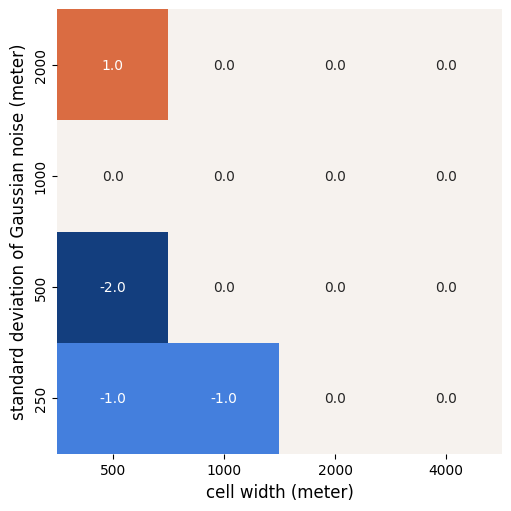

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
sns.heatmap(
    pivoted_toronto_x.sort_index(ascending=False),
    annot=True,
    fmt="0",
    cbar=False,
    cmap=cmap,
    vmin=-2,
    vmax=2,
    ax=ax,
)
ax.set_xlabel("cell width (meter)", fontsize=12)
ax.set_ylabel("standard deviation of Gaussian noise (meter)", fontsize=12)
# for i in ["svg"]:
#     fig.savefig(
#         f"../figures/noise_evaluation_toronto_x.{i}",
#         dpi=300,
#         metadata=config["metadata"][i],
#     )

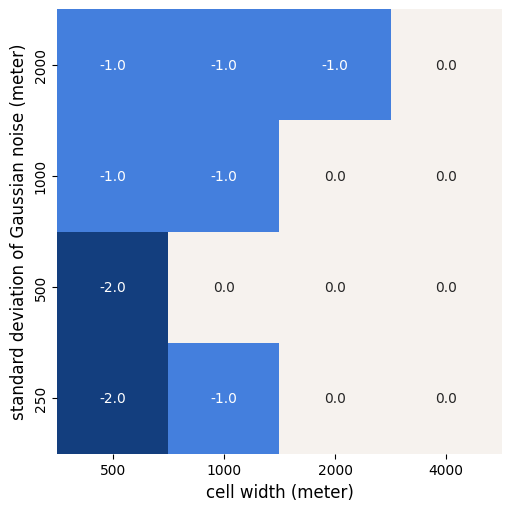

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), layout="constrained")
sns.heatmap(
    pivoted_toronto_y.sort_index(ascending=False),
    annot=True,
    fmt="0",
    cbar=False,
    cmap=cmap,
    vmin=-2,
    vmax=2,
    ax=ax,
)
ax.set_xlabel("cell width (meter)", fontsize=12)
ax.set_ylabel("standard deviation of Gaussian noise (meter)", fontsize=12)
# for i in ["svg"]:
#     fig.savefig(
#         f"../figures/noise_evaluation_toronto_y.{i}",
#         dpi=300,
#         metadata=config["metadata"][i],
#     )

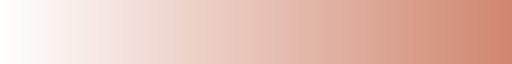

In [11]:
colors = ['#ffffff',  '#fff',  '#d08770']
positions = [0, 0.15, 1]
colors = ['#ffffff', '#d08770']
positions = [0, 1]
cmap = LinearSegmentedColormap.from_list('nord-based', list(zip(positions, colors)))
cmap

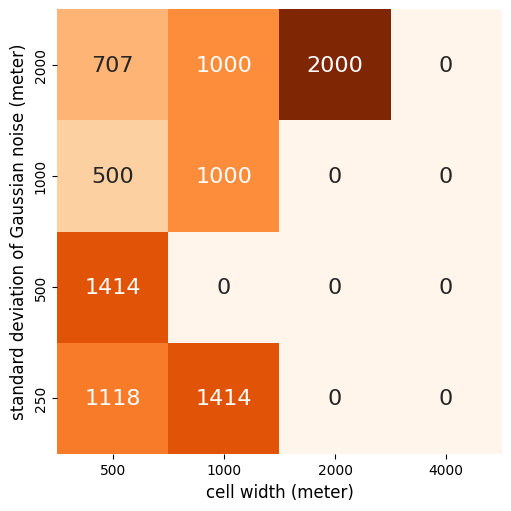

In [15]:
fig, ax = plt.subplots(figsize=(5, 5), layout="constrained", facecolor="none")
sns.heatmap(
    pivoted_toronto.map(int).sort_index(ascending=False),
    annot=True,
    annot_kws=dict(fontsize=16),
    fmt="0",
    cbar=False,
    cmap="Oranges",
    # cmap=cmap,
    ax=ax,
    vmax=2000,
)
ax.set_xlabel("cell width (meter)", fontsize=12)
ax.set_ylabel("standard deviation of Gaussian noise (meter)", fontsize=12)
for i in ["svg"]:
    fig.savefig(
        f"../figures/noise_evaluation_toronto.{i}",
        dpi=300,
        metadata=config["metadata"][i],
    )

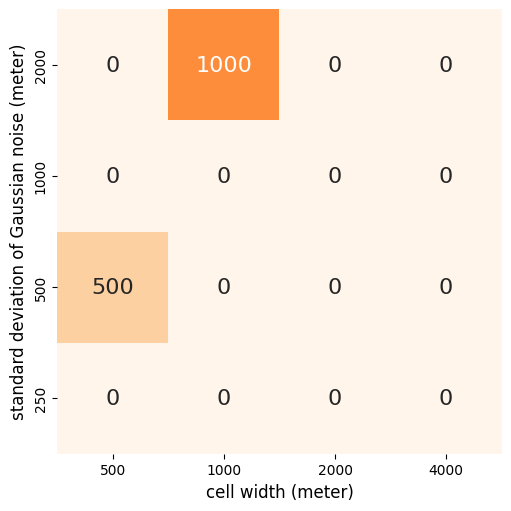

In [14]:
fig, ax = plt.subplots(figsize=(5, 5), layout="constrained", facecolor="none")
sns.heatmap(
    pivoted_london.map(int).sort_index(ascending=False),
    annot=True,
    annot_kws=dict(fontsize=16),
    fmt="0",
    cbar=False,
    cmap="Oranges",
    # cmap=cmap,
    ax=ax,
    vmax=2000,
)
ax.set_xlabel("cell width (meter)", fontsize=12)
ax.set_ylabel("standard deviation of Gaussian noise (meter)", fontsize=12)
for i in ["svg"]:
    fig.savefig(
        f"../figures/noise_evaluation_london.{i}",
        dpi=300,
        metadata=config["metadata"][i],
    )

In [49]:
normal = gpd.read_file("../output/toronto/grid_1000_1000_enriched.geojson")
blurred = gpd.read_file("../output/toronto/noise/1000/grid_1000_1000_enriched.geojson")
blurred_2k = gpd.read_file(
    "../output/toronto/noise/2000/grid_1000_1000_enriched.geojson"
)

<Axes: >

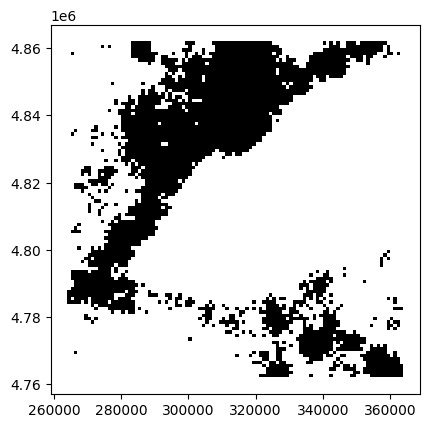

In [52]:
blurred.plot(column="bin", cmap="binary")

In [59]:
m = normal[["x", "y", "bin", "geometry"]].merge(
    blurred[["x", "y", "bin"]], on=["x", "y"], suffixes=["", "_blur"]
)
m.head(3)

,x,y,bin,geometry,bin_blur
0,0,0,0,"POLYGON ((264000 4762000, 265000 4762000, 2650...",0
1,0,1,0,"POLYGON ((264000 4763000, 265000 4763000, 2650...",0
2,0,2,0,"POLYGON ((264000 4764000, 265000 4764000, 2650...",0


In [62]:
def foo(x):
    result = None
    if x["bin"] == x["bin_blur"] == 1:
        result = 1
    if x["bin"] == x["bin_blur"] == 0:
        result = 0
    if x["bin"] == 0 and x["bin_blur"] == 1:
        result = 2
    if x["bin"] == 1 and x["bin_blur"] == 0:
        result = -1
    return result


m["c"] = m.apply(foo, axis=1)

In [66]:
cmap = ListedColormap(
    [
        "red",
        "white",
        "black",
        "blue",
    ]
)

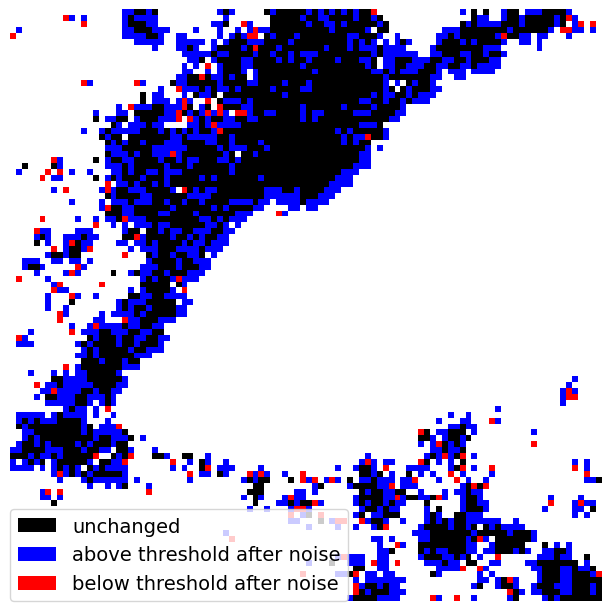

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), layout="constrained")
m.plot(column="c", cmap=cmap, ax=ax)
ax.margins(0)
ax.axis("off")
legend_elements = [
    Patch(facecolor="black", label="unchanged"),
    # Patch(facecolor="blue", label="occupied after noise"),
    # Patch(facecolor="red", label="empty after noise"),
    Patch(facecolor="blue", label="above threshold after noise"),
    Patch(facecolor="red", label="below threshold after noise"),
]
fig.legend(handles=legend_elements, ncols=1, fontsize=14, loc="lower left")
for i in config["formats"]:
    fig.savefig(
        f"../figures/noise_as_blur.{i}",
        dpi=300,
        pad_inches=0,
        metadata=config["metadata"] if i != "svg" else None,
    )